# Simple regression with random forest

Basic TF experiments

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error

Get training data

In [3]:
dat = pd.read_csv("./rbfs/phi_1_reduce.csv")
dat.head()

,Unnamed: 0,0,1,2,3,4,5,6,7,8,...,211,212,213,214,215,216,y,site,date,normalized_time
0,0,1.000000,0.933712,0.760067,0.539408,0.333740,0.180022,0.084658,0.034709,0.012406,...,0.0,0.0,0.0,0.0,0.0,0.0,0.063,2005,2023-06-30,0.000000
1,1,0.999951,0.937103,0.765636,0.545359,0.338664,0.183351,0.086541,0.035611,0.012775,...,0.0,0.0,0.0,0.0,0.0,0.0,0.061,2005,2023-06-30,0.002976
2,2,0.999803,0.940414,0.771169,0.551323,0.343628,0.186723,0.088457,0.036534,0.013155,...,0.0,0.0,0.0,0.0,0.0,0.0,0.057,2005,2023-06-30,0.005952
3,3,0.999557,0.943643,0.776666,0.557296,0.348630,0.190138,0.090406,0.037476,0.013544,...,0.0,0.0,0.0,0.0,0.0,0.0,0.049,2005,2023-06-30,0.008929
4,4,0.999213,0.946791,0.782125,0.563279,0.353670,0.193597,0.092390,0.038439,0.013943,...,0.0,0.0,0.0,0.0,0.0,0.0,0.044,2005,2023-06-30,0.011905


In [4]:
dat.shape

(2673, 222)

In [5]:
X_train = dat.iloc[:, 1:218].to_numpy()
y_train = dat['y'].to_numpy()
t_train = dat['normalized_time']

(array([ 17.,  90., 204., 336., 540., 529., 483., 368.,  77.,  29.]),
 array([0.002 , 0.0102, 0.0184, 0.0266, 0.0348, 0.043 , 0.0512, 0.0594,
        0.0676, 0.0758, 0.084 ]),
 <BarContainer object of 10 artists>)

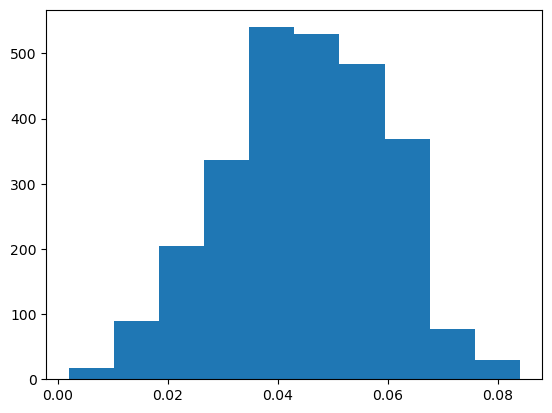

In [6]:
plt.hist(y_train)

Get data for predictions

In [7]:
dat_pred = pd.read_csv("./rbfs/phi_2_reduce.csv")
dat_pred.shape

(94272, 221)

In [8]:
X_test = dat_pred.iloc[:, 1:218].to_numpy()
y_test = dat_pred['y'].to_numpy()
t_test = dat_pred['normalized_time']

(array([1.2350e+03, 9.3960e+03, 1.1907e+04, 1.7141e+04, 2.8420e+04,
        2.0824e+04, 2.2600e+03, 4.0300e+02, 1.0000e+01, 2.0000e+00]),
 array([-0.0083 ,  0.00408,  0.01646,  0.02884,  0.04122,  0.0536 ,
         0.06598,  0.07836,  0.09074,  0.10312,  0.1155 ]),
 <BarContainer object of 10 artists>)

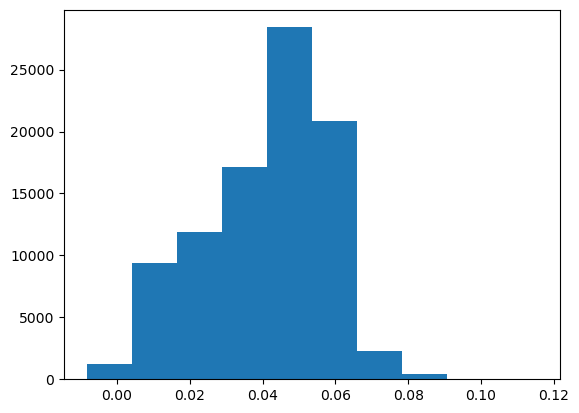

In [9]:
plt.hist(y_test)

## Random forest

In [10]:
from sklearn import ensemble
from sklearn_quantile import RandomForestQuantileRegressor


In [11]:
n_feat = X_train.shape[1]

### Model 1 (Simple RF regression)

In [12]:
aq_rf = ensemble.RandomForestRegressor()

In [13]:
aq_rf.fit(X_train, y_train)

RandomForestRegressor()

In [14]:
y_test_pred = aq_rf.predict(X_test)
#mean_absolute_error(y_test, y_test_pred)

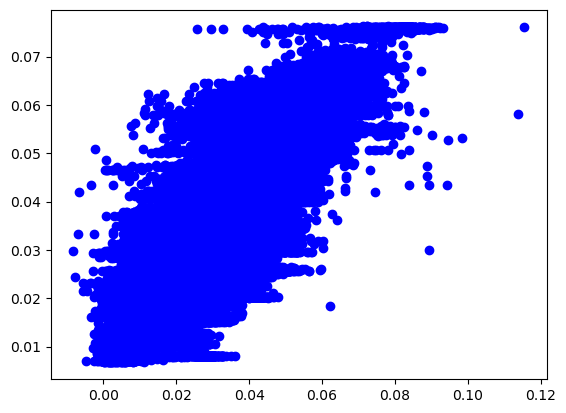

In [16]:
plt.plot(y_test, y_test_pred, 'bo')

In [15]:
aq_qrf = RandomForestQuantileRegressor(q=[0.05, 0.50, 0.95])
aq_qrf.fit(X_train, y_train)

RandomForestQuantileRegressor(q=[0.05, 0.5, 0.95])

In [26]:
y_test_qpred = aq_qrf.predict(X_test)
#mean_absolute_error(y_test, y_test_pred)
y_test_qpred

/Users/u0784726/miniforge3/envs/dk/lib/python3.10/site-packages/sklearn/utils/deprecation.py:86: FutureWarning: Function delayed is deprecated; The function `delayed` has been moved from `sklearn.utils.fixes` to `sklearn.utils.parallel`. This import path will be removed in 1.5.
  warnings.warn(msg, category=FutureWarning)
/Users/u0784726/miniforge3/envs/dk/lib/python3.10/site-packages/sklearn/utils/parallel.py:116: UserWarning: `sklearn.utils.parallel.delayed` should be used with `sklearn.utils.parallel.Parallel` to make it possible to propagate the scikit-learn configuration of the current thread to the joblib workers.
  warnings.warn(


array([[0.058     , 0.058     , 0.058     , ..., 0.04116667, 0.04116667,
        0.04116667],
       [0.059     , 0.059     , 0.059     , ..., 0.04802598, 0.04802598,
        0.04802598],
       [0.063     , 0.063     , 0.063     , ..., 0.051     , 0.051     ,
        0.051     ]], dtype=float32)

In [27]:
y_test_qpred[0]

array([0.058     , 0.058     , 0.058     , ..., 0.04116667, 0.04116667,
       0.04116667], dtype=float32)

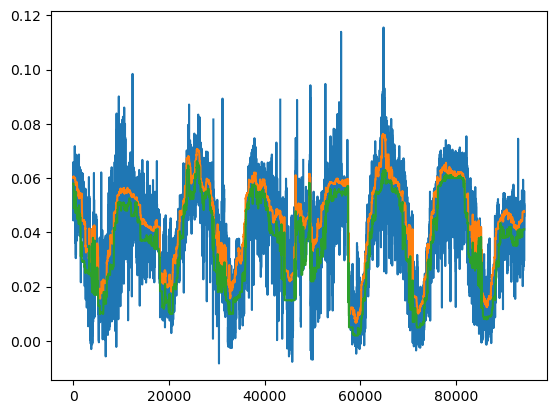

In [28]:
plt.plot(y_test)
plt.plot(y_test_pred)
plt.plot(y_test_qpred[0])
plt.show()

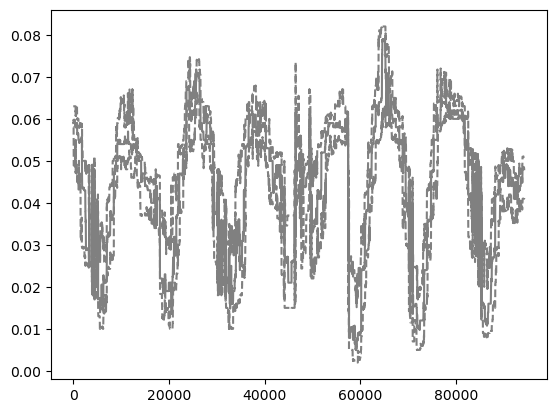

In [33]:
plt.plot(y_test_qpred[0], 'grey', linestyle='--')
plt.plot(y_test_qpred[1], 'grey')
plt.plot(y_test_qpred[2], 'grey', linestyle='--')
plt.show()

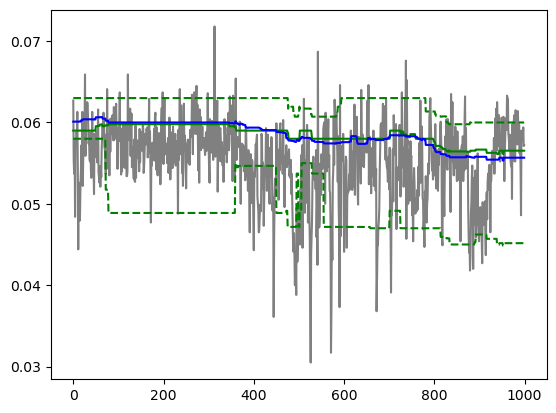

In [41]:
plt.plot(y_test[0:1000], 'grey', label='Obs')
plt.plot(y_test_qpred[0][0:1000], 'green', linestyle='--')
plt.plot(y_test_qpred[1][0:1000], 'green')
plt.plot(y_test_qpred[2][0:1000], 'green', linestyle='--')
plt.plot(y_test_pred[0:1000], 'blue')
plt.show()

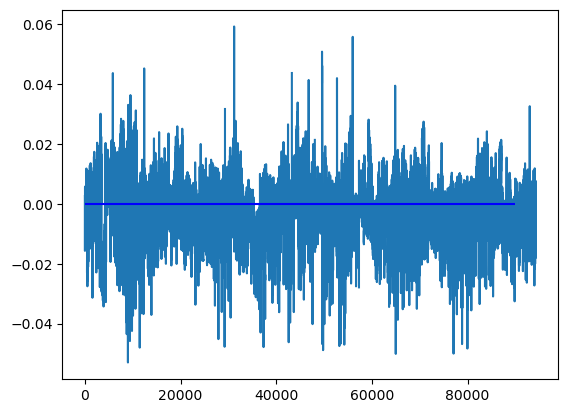

In [18]:
plt.plot(y_test - y_test_pred)
plt.hlines(y = 0, xmin = 0, xmax = 90000, colors = 'b')


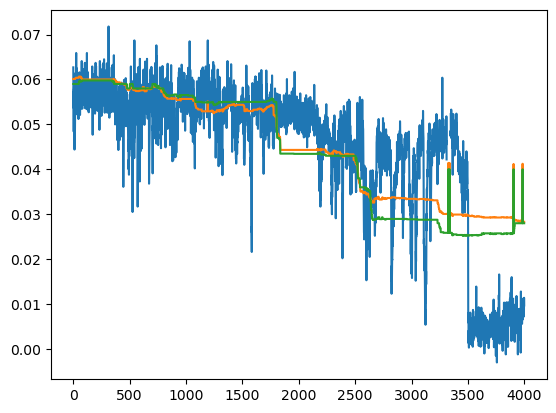

In [39]:
plt.plot(y_test[0:4000])
plt.plot(y_test_pred[0:4000])
plt.plot(y_test_qpred[1][0:4000])
plt.show()

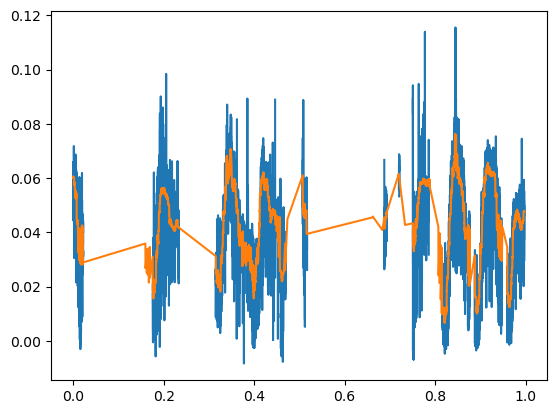

In [20]:
plt.plot(t_test, y_test)
plt.plot(t_test, y_test_pred)
plt.show()

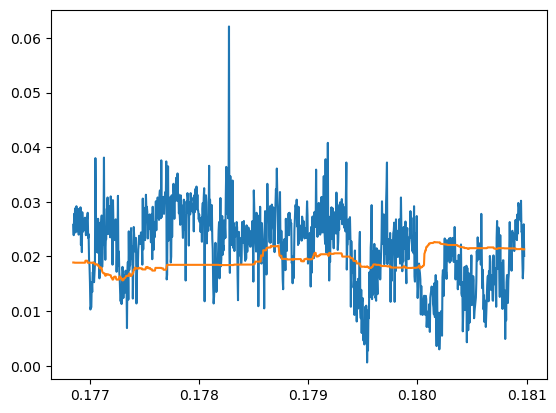

In [21]:
plt.plot(t_test[5500:6500], y_test[5500:6500])
plt.plot(t_test[5500:6500], y_test_pred[5500:6500])
plt.show()

## Output

In [22]:
dat_pred.shape

(94272, 221)

In [23]:
out_df = pd.read_csv("./rbfs/phi_2_reduce_crds.csv")

In [24]:
out_df['obs'] = y_test
out_df['pred'] = y_test_pred
out_df['diff'] = y_test_pred - y_test

In [25]:
out_df.to_csv("./output/pred_example.csv", index=False)